<a href="https://colab.research.google.com/github/bharya/fastai-v3/blob/master/cats_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive

/content/drive


In [3]:
cd 'My Drive'

/content/drive/My Drive


In [0]:
from fastai.vision import *

In [0]:
folder='cheetah'
file = 'cheetah.csv'

In [0]:
path = Path('cats')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [7]:
path.ls

<bound method <lambda> of PosixPath('cats')>

In [8]:
download_images(path/file, dest, max_pics=200)

In [0]:
folder='jaguar'
file = 'jaguar.csv'

In [0]:
path = Path('cats')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [11]:
download_images(path/file, dest, max_pics=200)

In [0]:
folder='leopard'
file = 'leopard.csv'

In [0]:
path = Path('cats')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [14]:
download_images(path/file, dest, max_pics=200)

In [0]:
classes = ['cheetah','leopard','jaguar']

In [16]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cheetah


leopard


jaguar


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [18]:
data.classes

['cheetah', 'jaguar', 'leopard']

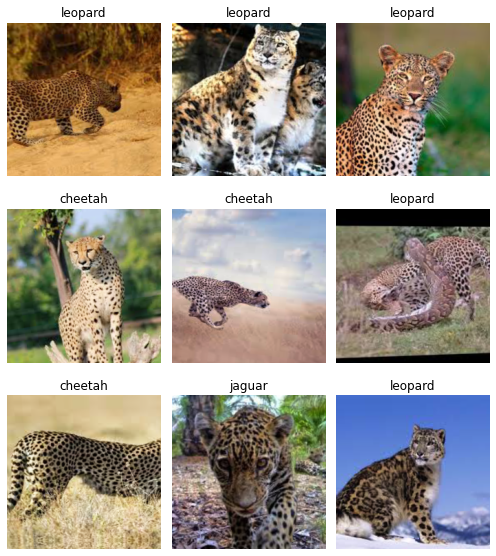

In [19]:
data.show_batch(rows=3, figsize=(7,8))

In [20]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cheetah', 'jaguar', 'leopard'], 3, 192, 48)

In [25]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [26]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.462436,0.354530,0.145833,01:50
1,1.098037,0.637747,0.145833,01:51
2,0.836505,0.339046,0.062500,01:53
3,0.674193,0.388048,0.062500,01:52
4,0.574516,0.370437,0.062500,01:54


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [30]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.306223,0.358044,0.062500,02:34
1,0.263823,0.356728,0.104167,02:30


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [33]:
interp = ClassificationInterpretation.from_learner(learn)

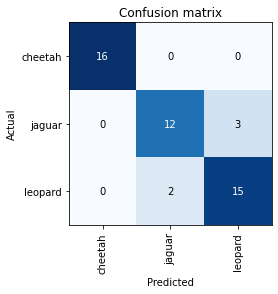

In [34]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
 db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet50, metrics=error_rate)

learn_cln.load('stage-2');

In [38]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [39]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [40]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

In [0]:
learn = load_learner(path)

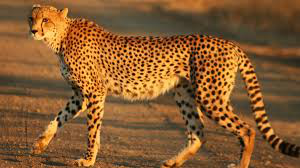

In [45]:
img = open_image(path/'cheetah'/'00000022.jpg')
img

In [46]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tensor(0)